## CREDIT CARD DATA ANALYSIS

#### Importing Important Libraries

In [322]:
import pandas as pd
import numpy as np
import os
import datetime as dt                      
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [324]:
os.chdir('C:\\Users\\ASUS\\OneDrive\\Desktop\\python case studies\\Data Analysis Projects\\Case Study 2 - Credit Card Case Study')

#### Uploading Data

In [326]:
customer = pd.read_csv('Customer Acqusition.csv')
spend = pd.read_csv('spend.csv')
repayment = pd.read_csv('Repayment.csv')

#### Exploratory Data Analysis

In [328]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1499 non-null   float64
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(2), object(2)
memory usage: 47.0+ KB


Replacing SL NO: at index 0 with 1.0

In [331]:
repayment.fillna(1.0,inplace=True)

In [332]:
spend.rename(columns={'Month':'Date'},inplace=True)
repayment.rename(columns={'Month':'Date'},inplace=True)

Changing datatypes of Date column in both spend and repayment

In [334]:
spend['Date'] = pd.to_datetime(spend['Date'],format='%d-%b-%y',errors='coerce')
repayment['Date'] = pd.to_datetime(repayment['Date'],format='%d-%b-%y',errors='coerce')

#### Questions

1. In the above dataset,

a. In case age is less than 18, replace it with mean of age values.

In [339]:
customer['Age'] = customer['Age'].apply(lambda x: customer['Age'].mean() if x<18 else x)

b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [342]:
spend_merged = spend.merge(customer,on='Customer',how='left')
spend_merged['Amount'] = spend_merged.apply(lambda x: 0.5*x['Limit'] if x['Amount']>x['Limit'] else x['Amount'],axis=1)
spend['Amount'] = spend_merged['Amount']

c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [344]:
repay_merged = repayment.merge(customer,on='Customer',how='left')
repay_merged['Amount'] = repay_merged.apply(lambda x: x['Limit'] if x['Amount']>x['Limit'] else x['Amount'],axis=1)
repayment['Amount'] = repay_merged['Amount']

2. From the above dataset create the following summaries:

a. How many distinct customers exist?

In [349]:
print('Number of distinct customers :',customer['Customer'].nunique())

Number of distinct customers : 100


 b. How many distinct categories exist?

In [352]:
print('Number of unique categories :',customer['Product'].nunique())

Number of unique categories : 3


 c. What is the average monthly spend by customers?

In [354]:
spend_merged['Month'] = spend_merged['Date'].apply(lambda x: pd.Timestamp.strftime(x,'%B'))
spend_merged['Year'] = spend_merged['Date'].dt.year
round(spend_merged.groupby(['Year','Month'])['Amount'].mean())

Year  Month    
2004  April        124622.0
      February     136998.0
      January      144234.0
      March        133708.0
      May          153327.0
      November      79642.0
      September    171579.0
2005  April        146431.0
      August       141707.0
      December      84416.0
      February     154334.0
      January      192272.0
      July         120803.0
      June         190726.0
      May          154626.0
      November     178120.0
      October       89879.0
      September    109424.0
2006  April        134744.0
      August       213864.0
      December     150129.0
      February     148479.0
      January      136313.0
      July         189089.0
      June         155971.0
      March        131720.0
      May          143694.0
      November     144284.0
      October      172156.0
      September    142392.0
Name: Amount, dtype: float64

 d. What is the average monthly repayment by customers?

In [356]:
repay_merged['Month'] = repay_merged['Date'].apply(lambda x: pd.Timestamp.strftime(x,'%B'))
repay_merged['Year'] = repay_merged['Date'].dt.year
round(repay_merged.groupby(['Year','Month'])['Amount'].mean())

Year  Month    
2004  April        175633.0
      February     125613.0
      January      159972.0
      March        177768.0
      May          151310.0
      November     119227.0
      September    118926.0
2005  April        121163.0
      August       149984.0
      December     179119.0
      February     157357.0
      January      181261.0
      July         149945.0
      June          97052.0
      May          200122.0
      November     169226.0
      October      136268.0
      September     73560.0
2006  April        180529.0
      August       161553.0
      December     201159.0
      February     188198.0
      January      204422.0
      July         170153.0
      June         165429.0
      March        154862.0
      May          171270.0
      November     145565.0
      October      203970.0
      September    199025.0
Name: Amount, dtype: float64

 e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [359]:
monthly_spend = spend_merged.groupby(['Year','Month'])['Amount'].sum()
monthly_repay = repay_merged.groupby(['Year','Month'])['Amount'].sum()
monthly_data = pd.merge(monthly_repay,monthly_spend,on=['Year','Month'],how='outer',suffixes=('_repay','_spend'))

In [360]:
monthly_data.fillna(0,inplace=True)

In [361]:
monthly_data['Profit'] = monthly_data['Amount_repay'] - monthly_data['Amount_spend']
monthly_data['Bank_profit'] = monthly_data['Profit'].apply(lambda x: 0.029*x if x>0 else 0)
monthly_data

Amount_repay  Amount_spend      Profit   Bank_profit
Year Month                                                          
2004 April        5268979.74    3489415.34  1779564.40   51607.36760
     February     3391537.65    3835951.84  -444414.19       0.00000
     January     44792020.72   44279811.96   512208.76   14854.05404
     March        2666519.22    1871913.27   794605.95   23043.57255
     May          3782759.91    2146577.36  1636182.55   47449.29395
     November     1788398.63    1114989.10   673409.53   19528.87637
     September    1902816.41    2402109.69  -499293.28       0.00000
2005 April        3634903.56    4100065.73  -465162.17       0.00000
     August       5549411.88    3967808.19  1581603.69   45866.50701
     December     2149428.61    1181824.00   967604.61   28060.53369
     February    25491800.20   25928183.21  -436383.01       0.00000
     January      4894040.25    5383606.78  -489566.53       0.00000
     July         1799339.14    1691243.28   108095.86    3134.77994
     June         3493885.53    8010511.98 -4516626.45       0.00000
     May         30818764.69   21647612.42  9171152.27  265963.41583
     November     7107487.13    7481048.89  -373561.76       0.00000
     October      1635219.22    1258311.90   376907.32   10930.31228
     September     882719.54    1531932.87  -649213.33       0.00000
2006 April       16247638.94   12665908.03  3581730.91  103870.19639
     August       1938641.97    2994094.85 -1055452.88       0.00000
     December     2413907.27    2101811.05   312096.22    9050.79038
     February     7339728.53    6236117.45  1103611.08   32004.72132
     January      2453064.46    1908375.22   544689.24   15795.98796
     July         6295652.89    5294483.07  1001169.82   29033.92478
     June         1985148.84    2183600.98  -198452.14       0.00000
     March       31591837.84   28583302.72  3008535.12   87247.51848
     May         14900517.86    8046846.48  6853671.38  198756.47002
     November     3930259.60    4039950.52  -109690.92       0.00000
     October      2447635.07    2410188.02    37447.05    1085.96445
     September    2388294.79    1993489.03   394805.76   11449.36704

f. What are the top 5 product types?

In [364]:
top_5_product_types = spend['Type'].value_counts().sort_values(ascending=False).head(5).reset_index()
print('The top 5 product types are :',list(top_5_product_types['Type']))

The top 5 product types are : ['PETRO', 'FOOD', 'CAMERA', 'AIR TICKET', 'TRAIN TICKET']


 g. Which city is having maximum spend?

In [366]:
city = spend_merged.groupby('City')['Amount'].sum().sort_values(ascending=False).head(1).reset_index()
print(city['City'][0],'is the city having maximum spend')

COCHIN is the city having maximum spend


h. Which age group is spending more money?

In [369]:
bins = [18,25,35,45,55,65,100]
labels = ['18-25','26-35','36-45','46-55','56-65','66-100']
spend_merged['Age_group'] = pd.cut(spend_merged['Age'],bins=bins,labels=labels,right=False)

In [370]:
age_grp = spend_merged.groupby('Age_group')['Amount'].sum().sort_values(ascending=False).index[0]
print(age_grp,'is the age group spending most money')

46-55 is the age group spending most money


i. Who are the top 10 customers in terms of repayment?

In [372]:
top_10_cust = repay_merged.groupby('Customer')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
top_10_cust

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [374]:
data = spend_merged.groupby(['Year','City','Product'])['Amount'].sum().reset_index()
pivot = pd.pivot_table(data,values='Amount',aggfunc='sum',index=['Year','City'],columns=['Product'])

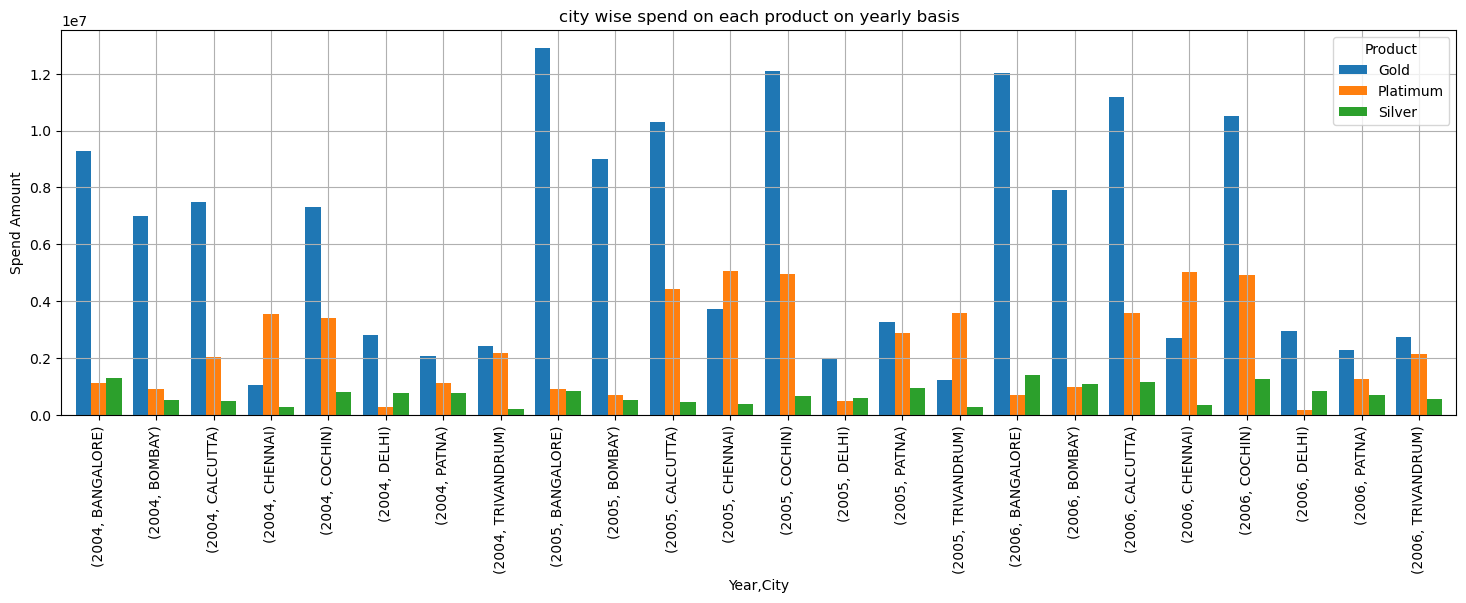

In [375]:
pivot.plot(kind='bar',figsize=(18,5),width=0.8)
plt.ylabel('Spend Amount')
plt.title('city wise spend on each product on yearly basis')
plt.grid()
plt.show()

4. Create graphs for

a. Monthly comparison of total spends, city wise

In [378]:
data = spend_merged.groupby(['City','Month'])['Amount'].sum().reset_index().sort_values(by='Month')
monthly_city_spend = pd.pivot_table(data,index='City' , values='Amount' ,columns='Month' ,aggfunc='sum')

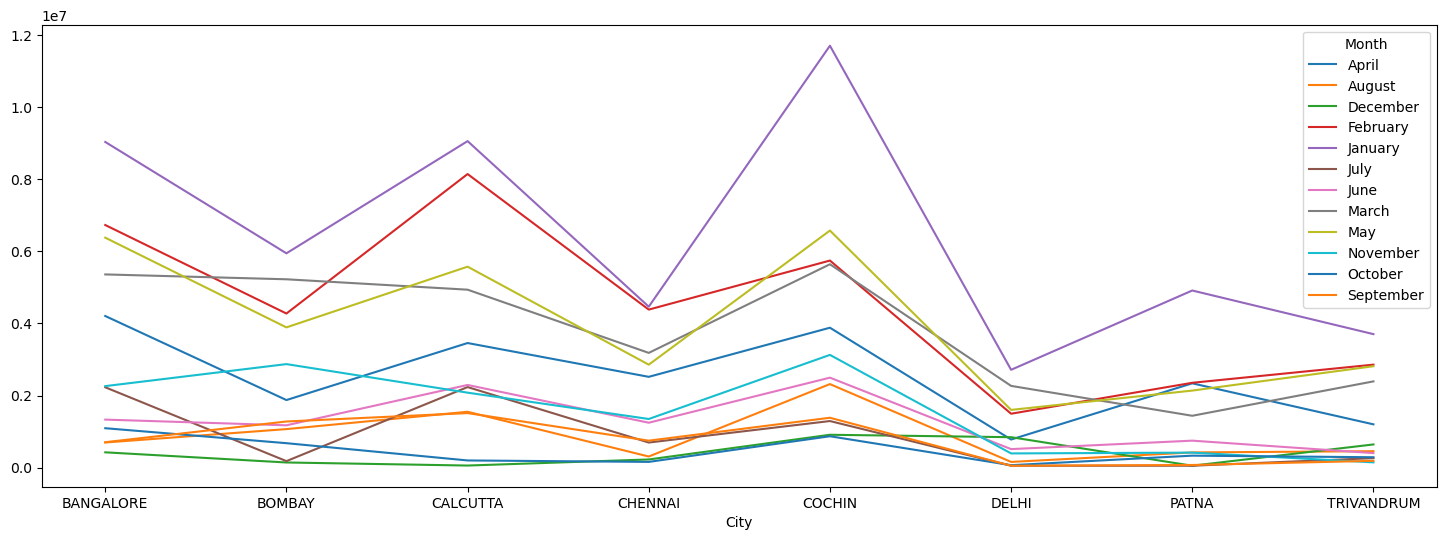

In [380]:
monthly_city_spend.plot(kind='line',figsize=(18,6))
plt.show()

b. Comparison of yearly spend on air tickets

In [383]:
yearly_spend = spend_merged[spend_merged['Type']=='AIR TICKET'].groupby('Year')['Amount'].sum().reset_index()

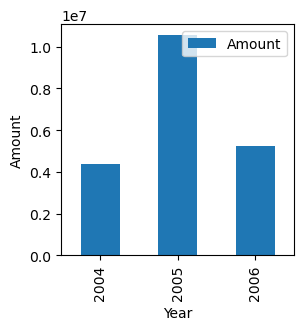

In [385]:
yearly_spend.plot(kind='bar', x='Year', y='Amount', figsize=(3,3))
plt.ylabel('Amount')
plt.show()

c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


In [388]:
monthly_prod_spend = spend_merged.groupby(['Product','Month'])['Amount'].sum().reset_index()

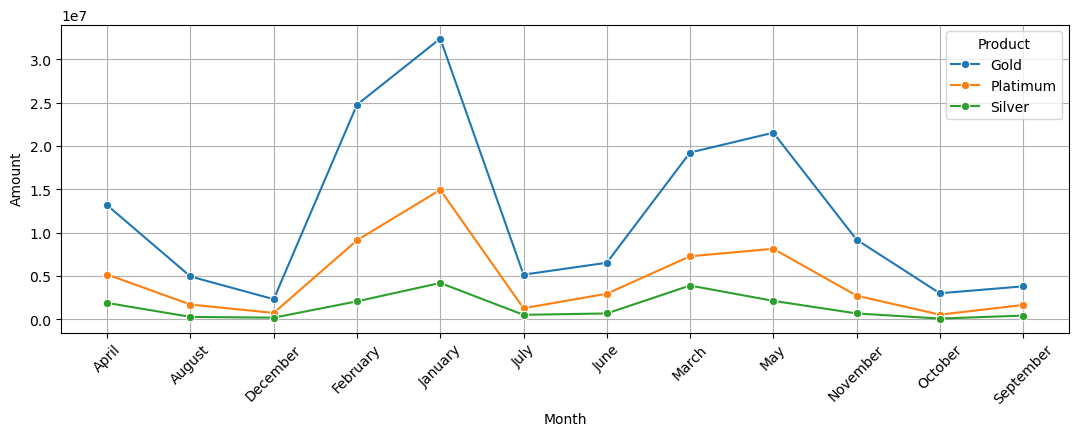

In [389]:
plt.figure(figsize=(13,4))
sns.lineplot(monthly_prod_spend,x='Month', y='Amount', hue='Product', marker='o')
plt.xticks(rotation=45)
plt.grid()
plt.show()

5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [400]:
def top_customers(product,timeperiod):
    if product.lower()=='gold' and timeperiod.lower()=='month':
        pivot = pd.pivot_table(repay_merged,index=['Product','City','Customer'],columns='Month',values='Amount',aggfunc='sum')
        return pivot.loc['Gold']
    elif product.lower()=='silver' and timeperiod.lower()=='month':
        pivot = pd.pivot_table(repay_merged,index=['Product','City','Customer'],columns='Month',values='Amount',aggfunc='sum')
        return pivot.loc['Silver']
    elif product.lower()=='platinum' and timeperiod.lower()=='month':
        pivot = pd.pivot_table(repay_merged,index=['Product','City','Customer'],columns='Month',values='Amount',aggfunc='sum')
        return pivot.loc['Platimum']
    elif product.lower()=='gold' and timeperiod.lower()=='year':
        pivot = pd.pivot_table(repay_merged,index=['Product','City','Customer'],columns='Year',values='Amount',aggfunc='sum')
        return pivot.loc['Gold']
    elif product.lower()=='silver' and timeperiod.lower()=='year':
        pivot = pd.pivot_table(repay_merged,index=['Product','City','Customer'],columns='Year',values='Amount',aggfunc='sum')
        return pivot.loc['Silver']
    elif product.lower()=='platinum' and timeperiod.lower()=='year':
        pivot = pd.pivot_table(repay_merged,index=['Product','City','Customer'],columns='Year',values='Amount',aggfunc='sum')
        return pivot.loc['Platimum']

In [401]:
top_customers('silver','year')

Year                       2004        2005        2006
City       Customer                                    
BANGALORE  A18        491592.71   638296.41   700000.00
           A23        664965.71  1000010.00   872925.32
           A59        676557.50   427247.08   600018.00
           A72        100000.00         NaN         NaN
           A76              NaN   265619.05         NaN
           A77              NaN         NaN     3159.62
BOMBAY     A22        953419.47  1141542.81   945271.83
           A75              NaN   100003.00         NaN
           A80              NaN         NaN   481205.64
CALCUTTA   A2         400000.00   410274.00   200000.00
           A58        533815.62   540173.85   411640.17
           A73              NaN   100001.00         NaN
           A78              NaN         NaN    55344.81
           A87              NaN         NaN   100003.00
CHENNAI    A85              NaN         NaN   100001.00
           A9         380193.34   500015.00   697845.29
           A96        100000.00         NaN         NaN
COCHIN     A100        69551.19         NaN         NaN
           A25        786338.08   611555.69  1000030.00
           A7         500005.00   422177.27   608997.87
           A74              NaN   100002.00         NaN
           A79              NaN         NaN   193230.31
DELHI      A24        397014.53  1184870.98   711068.52
           A6         548574.15   427398.18   507280.51
PATNA      A46        713614.32  1116730.89   839228.07
           A8         800016.00   400008.00   531812.40
           A84              NaN         NaN   100000.00
TRIVANDRUM A57       1000010.00   200002.00   655926.99
           A68        100000.00         NaN   100000.00
           A86              NaN         NaN   100002.00